# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("SAMPLE.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18621393,
            "id": 1,
            "last_updated": 1612642355,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 747810118257,
                    "percent_change_1h": -0.816924495527519,
                    "percent_change_24h": 6.19498197031828,
                    "percent_change_7d": 17.0993338853045,
                    "percentage_change_1h": -0.816924495527519,
                    "percentage_change_24h": 6.19498197031828,
                    "percentage_change_7d": 17.0993338853045,
                    "price": 39990.0,
                    "volume_24h": 56366869968
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18621393,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 114563280,
            "id": 1027,
            "last_updated": 1612642110,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 195627863917,
                    "percent_change_1h": -0.101746557695398,
                    "percent_change_24h": 0.0765631966174579,
                    "percent_change_7d": 23.3029037912541,
                    "percentage_change_1h": -0.101746557695398,
                    "percentage_change_24h": 0.0765631966174579,
                    "percentage_change_7d": 23.3029037912541,
                    "price": 1701.93,
                    "volume_24h": 37116735758
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 114563280,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']["1"]['quotes']['USD']['price']

# Print the current price of BTC
btc_price

39990.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']["1027"]['quotes']['USD']['price']

# Print the current price of ETH
eth_price

1701.93

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins*btc_price

# Print current value of your holding in BTC
print(f"Current price of BTC: ${btc_value: ,.2f}")

Current price of BTC: $ 47,988.00


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins*eth_price

# Print current value of your holding in ETH
print(f"Current price of ETH: ${eth_value: ,.2f}")

Current price of ETH: $ 9,020.23


In [59]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Current total value of the crypto wallet: ${total_crypto_wallet: ,.2f}")

Current total value of the crypto wallet: $ 57,008.23


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
ticker = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-02-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-05", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
prices_df

AGG                                    SPY  \
                             open    high    low   close   volume   open   
time                                                                       
2021-02-05 00:00:00-05:00  116.91  116.96  116.7  116.72  3230833  388.2   

                                                               
                             high       low   close    volume  
time                                                           
2021-02-05 00:00:00-05:00  388.47  386.1444  387.68  39312522

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"AGG closing price: ${agg_close_price: ,.2f}")

AGG closing price: $ 116.72


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"SPY closing price: ${spy_close_price: ,.2f}")

SPY closing price: $ 387.68


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"Current AGG value: ${agg_value: ,.2f}")

Current AGG value: $ 23,344.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"Current SPY value: ${spy_value: ,.2f}")

Current SPY value: $ 42,644.80


In [80]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Total value of stocks and bonds in the portfolio: ${total_stocks_bonds: ,.2f}")

Total value of stocks and bonds in the portfolio: $ 65,988.80


In [81]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Total value of the entire savings portfolio is: ${total_portfolio: ,.2f}")

Total value of the entire savings portfolio is: $ 122,997.03


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [90]:
# Consolidate financial assets data into a Python list
savings_data = ["crypto", "stock/bond"]
# Review the Python list savings_data
savings_data    

['crypto', 'stock/bond']

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [132]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    columns = ["Amount"],
    index = savings_data,
    data = [total_crypto_wallet, total_stocks_bonds]
    )
savings_df.index.name = "Asset Type"
savings_df

,Amount
Asset Type,
crypto,"57,008.23"
stock/bond,"65,988.80"


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition Pie Chart'}, ylabel='Amount'>

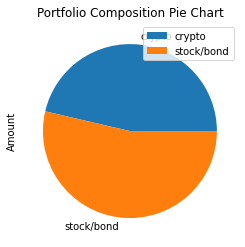

In [95]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', title = "Portfolio Composition Pie Chart")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [96]:
# Create a variable named emergency_fund_value
# Create a variable for the number of months you want to have saved
reserve_months = 3
emergency_fund_value = monthly_income * reserve_months
print(f"The value of the emergency fund is ${emergency_fund_value: ,}")

The value of the emergency fund is $ 36,000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [98]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations, you have enough money for your goal of {reserve_months} months.")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations, you have reached your goal of {reserve_months} months reserve.")
else: 
    print(f"You are only ${(emergency_fund_value - total_portfolio):, .2f} from reaching your emergency fund goal of {reserve_months} months.")

Congratulations, you have enough money for your goal of 3 months.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [51]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
start_date = pd.Timestamp("2011-02-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-05", tz="America/New_York").isoformat()


In [52]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
ten_yr_prices_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
ten_yr_prices_df.head()

AGG                                       SPY  \
                               open     high     low   close   volume    open   
time                                                                            
2020-09-15 00:00:00-04:00  118.2900  118.425  118.29  118.38  3634512  341.12   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.20  118.32  5190572  341.51   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.33  118.36  4263541  333.56   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.18  118.24  4548578  335.37   
2020-09-21 00:00:00-04:00  118.4100  118.420  118.25  118.26  4787684  325.70   

                                                                 
                               high       low   close    volume  
time                                                             
2020-09-15 00:00:00-04:00  342.0200  338.4683  340.15  43908367  
2020-09-16 00:00:00-04:00  343.0600  338.5200  338.81  70521698  
2020-09-17 00:00:00-04:00  337.6996  332.9910  335.86  80778657  
2020-09-18 00:00:00-04:00  335.4900  327.9700  330.69  88780313  
2020-09-21 00:00:00-04:00  327.0900  321.7300  327.00  86591719

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [70]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_yr_sim = MCSimulation(
    portfolio_data=ten_yr_prices_df,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*30,
)
# Review the simulation input data
MC_thirty_yr_sim.portfolio_data.head(-5)

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2020-09-15 00:00:00-04:00  118.2900  118.425  118.2900  118.38  3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.2000  118.32  5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.3300  118.36  4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.1800  118.24  4548578   
2020-09-21 00:00:00-04:00  118.4100  118.420  118.2500  118.26  4787684   
...                             ...      ...       ...     ...      ...   
2021-01-25 00:00:00-05:00  117.3900  117.560  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-15 00:00:00-04:00          NaN  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   
2020-09-21 00:00:00-04:00     0.000169  325.70  327.0900  321.7300  327.00   
...                                ...     ...       ...       ...     ...   
2021-01-25 00:00:00-05:00     0.002388  383.67  384.7700  378.4600  384.40   
2021-01-26 00:00:00-05:00    -0.000255  385.41  385.8500  383.5400  383.83   
2021-01-27 00:00:00-05:00     0.000085  380.22  380.3200  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.9300  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.6700  368.2700  370.19   

                                                   
                              volume daily_return  
time                                               
2020-09-15 00:00:00-04:00   43908367          NaN  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393  
2020-09-21 00:00:00-04:00   86591719    -0.011158  
...                              ...          ...  
2021-01-25 00:00:00-05:00   61090775     0.004022  
2021-01-26 00:00:00-05:00   36871235    -0.001483  
2021-01-27 00:00:00-05:00   99246554    -0.024464  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  

[95 rows x 12 columns]

In [71]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992691,1.001200,1.003150,1.007859,0.985484,0.996009,0.992855,1.006650,0.998140,0.998227,...,0.996317,0.998733,0.999960,0.992837,0.994887,1.001883,1.000568,0.994351,0.985196,1.012193
2,0.997412,1.007957,0.999833,1.001774,0.984713,1.001969,0.986543,1.003866,1.000882,1.002401,...,1.008366,0.999010,1.001263,0.994751,1.001799,1.007504,0.993323,0.991377,0.970024,1.019072
3,0.993309,1.003501,0.988105,1.013158,0.968475,1.006519,0.979233,1.009415,1.008037,1.005439,...,1.011670,0.992792,1.010561,1.004251,1.002269,1.007360,0.993809,0.997701,0.963158,1.011070
4,1.006755,1.021333,0.992510,1.012631,0.973570,1.002857,0.991104,1.015534,1.010910,1.001777,...,1.000107,0.988917,1.006699,1.006063,1.004072,1.009241,0.993876,0.990617,0.971292,1.005511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,435.653943,309.723564,426.603621,466.405055,278.461201,174.062752,127.199976,406.736961,567.817390,559.534827,...,239.951652,167.880542,276.976656,305.273101,284.847291,360.755675,151.801810,314.102368,476.476695,60.030420
7557,436.396053,312.942451,427.771397,469.639749,276.441915,173.803412,126.599193,403.676393,561.450954,556.863025,...,242.160555,168.429552,276.014233,308.407968,288.366375,359.900898,153.777896,313.440878,480.728551,59.889468
7558,436.845113,315.373371,427.638670,474.582959,279.016649,174.257016,126.734412,406.669729,564.081688,557.219408,...,241.877028,170.144316,276.183561,310.261842,287.536246,355.910563,154.187018,313.324432,479.094743,60.362766
7559,438.337045,313.550764,427.529931,474.145034,278.533725,174.496582,126.977286,412.251416,565.752260,557.326795,...,241.816252,170.650703,282.018705,310.240436,287.103483,351.838912,154.581299,309.897633,482.627511,60.521060


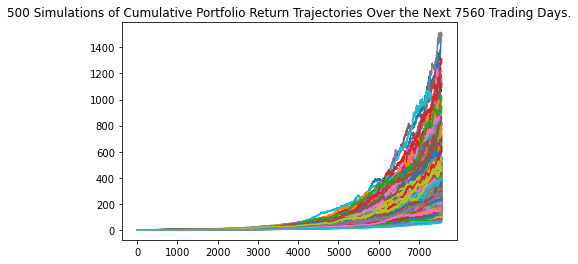

In [75]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_yr_plot = MC_thirty_yr_sim.plot_simulation()
MC_thirty_yr_plot.get_figure().savefig("MC Thirty Year Line Plot", bbox_inches = "tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

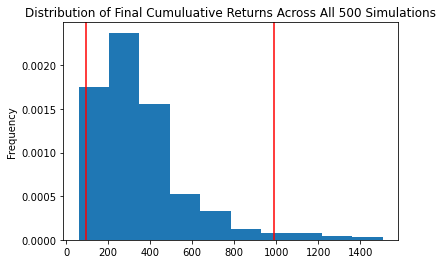

In [76]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_yr_dist = MC_thirty_yr_sim.plot_distribution()
MC_thirty_yr_dist.get_figure().savefig("MC Thirty Year Distribution")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [77]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_yr_table = MC_thirty_yr_sim.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MC_thirty_yr_table

count            500.000000
mean             353.869112
std              225.535660
min               59.229684
25%              202.796520
50%              298.325065
75%              438.310881
max             1507.439516
95% CI Lower      95.789858
95% CI Upper     988.013872
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [78]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stocks and bonds portion of the portfolio is ${total_stocks_bonds: ,.2f}")

The current balance of the stocks and bonds portion of the portfolio is $ 65,988.80


In [79]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_thirty_yr_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_thirty_yr_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with a current balance of ${total_stocks_bonds: ,.2f} in the portfolio,"
    f" over the next 30 years it will end within in the range of"
        f" ${ci_lower_thirty_cumulative_return: ,.2f} and ${ci_upper_thirty_cumulative_return: ,.2f}.")

There is a 95% chance that with a current balance of $ 65,988.80 in the portfolio, over the next 30 years it will end within in the range of $ 6,321,057.78 and $ 65,197,849.82.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [83]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_yr_sim = MCSimulation(
    portfolio_data=ten_yr_prices_df,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)
# Review the simulation input data
MC_ten_yr_sim.portfolio_data.head(-5)

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2020-09-15 00:00:00-04:00  118.2900  118.425  118.2900  118.38  3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.2000  118.32  5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.3300  118.36  4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.1800  118.24  4548578   
2020-09-21 00:00:00-04:00  118.4100  118.420  118.2500  118.26  4787684   
...                             ...      ...       ...     ...      ...   
2021-01-25 00:00:00-05:00  117.3900  117.560  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-15 00:00:00-04:00          NaN  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   
2020-09-21 00:00:00-04:00     0.000169  325.70  327.0900  321.7300  327.00   
...                                ...     ...       ...       ...     ...   
2021-01-25 00:00:00-05:00     0.002388  383.67  384.7700  378.4600  384.40   
2021-01-26 00:00:00-05:00    -0.000255  385.41  385.8500  383.5400  383.83   
2021-01-27 00:00:00-05:00     0.000085  380.22  380.3200  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.9300  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.6700  368.2700  370.19   

                                                   
                              volume daily_return  
time                                               
2020-09-15 00:00:00-04:00   43908367          NaN  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393  
2020-09-21 00:00:00-04:00   86591719    -0.011158  
...                              ...          ...  
2021-01-25 00:00:00-05:00   61090775     0.004022  
2021-01-26 00:00:00-05:00   36871235    -0.001483  
2021-01-27 00:00:00-05:00   99246554    -0.024464  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  

[95 rows x 12 columns]

In [84]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010643,1.009395,0.995340,1.000100,1.011440,1.006120,1.001733,1.005344,1.010492,0.987112,...,1.011902,0.999335,0.997968,1.002176,1.011489,1.011143,0.994273,0.995275,0.992324,1.013589
2,1.004976,1.021103,0.997590,1.002356,1.020587,0.987610,0.990329,0.989895,1.006519,0.991090,...,1.026798,0.985315,0.993251,1.001060,1.006548,1.002616,0.998564,0.991678,0.985451,1.007408
3,1.021984,1.014148,0.989751,0.992248,1.019836,0.987544,0.997275,0.984277,1.003204,1.000812,...,1.022899,0.979634,0.994478,0.996116,1.012085,0.989318,1.005242,0.978607,0.972135,1.015801
4,1.030768,1.020229,0.991873,0.979873,1.017690,0.993908,1.002437,1.007924,1.006325,0.993419,...,1.016489,0.975872,1.001474,0.986042,1.017102,0.986877,1.008175,0.971270,0.981525,1.012159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,24.706745,11.801617,22.121420,13.811867,10.461139,11.361619,18.522560,18.849415,13.789411,12.030265,...,18.354960,11.008149,12.361419,23.790334,18.807934,14.916616,20.246155,8.150846,10.681504,20.208987
2517,24.754312,11.739852,21.987577,13.894120,10.359471,11.447967,18.463263,18.820777,13.623638,11.956191,...,18.463411,10.955047,12.443731,23.909370,19.071378,14.813869,20.167380,8.126983,10.804490,20.185613
2518,25.157813,11.721053,21.981222,13.799687,10.309511,11.432275,18.706166,18.887724,13.715054,12.004763,...,18.610522,10.864282,12.526271,24.224752,19.316147,14.800902,20.039908,8.058335,10.872182,20.183644
2519,25.412198,11.918658,22.528445,13.875094,10.301201,11.427243,18.614873,19.110055,13.601125,12.122307,...,18.844640,10.934392,12.463441,24.541338,19.296638,14.933785,20.003868,8.147443,10.830142,20.296026


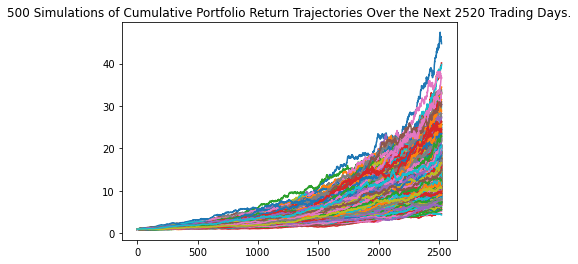

In [85]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_yr_plot = MC_ten_yr_sim.plot_simulation()
MC_ten_yr_plot.get_figure().savefig("MC Ten Year Line Plot", bbox_inches = "tight")

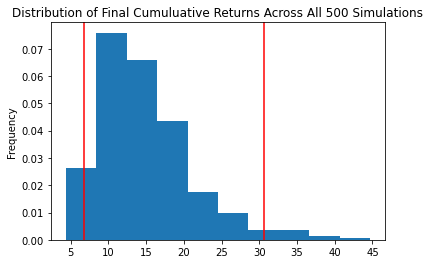

In [86]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_yr_dist = MC_ten_yr_sim.plot_distribution()
MC_ten_yr_dist.get_figure().savefig("MC Ten Year Distribution")

In [87]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_yr_table = MC_ten_yr_sim.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_ten_yr_table

count           500.000000
mean             14.890680
std               6.148664
min               4.370096
25%              10.723257
50%              13.517841
75%              17.928222
max              44.690123
95% CI Lower      6.749552
95% CI Upper     30.672097
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [88]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stocks and bonds portion of the portfolio is ${total_stocks_bonds: ,.2f}")

The current balance of the stocks and bonds portion of the portfolio is $ 65,988.80


In [89]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_yr_table[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_ten_yr_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with a current balance of ${total_stocks_bonds: ,.2f} in the portfolio,"
    f" over the next 10 years it will end within in the range of"
        f" ${ci_lower_ten_cumulative_return: ,.2f} and ${ci_upper_ten_cumulative_return: ,.2f}.")

There is a 95% chance that with a current balance of $ 65,988.80 in the portfolio, over the next 10 years it will end within in the range of $ 445,394.81 and $ 2,024,014.88.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** There is too much information missing to be able to answer this question at this point. The first problem is that we changed two variables (weight and time) between the first simulation and the second, and then are asked to compare the results. This is impossible to do because we cannot tell if the differences are due to the change in the time period, or the change in the weights of stocks versus bonds. To remedy this we must run two more simulations; one for a 30 year time period with the weights changed from 60/40 to 20/80, and one for a ten year time period with the weights set to 60/40 (we already ran the ten year simulation with the weights set to 20/80). Once this is completed we will be closer to having enough information to effectively answer the question.

## Run two more Monte Carlo simulations to be able to more effectively compare the data we already gathered

#### Run a Monte Carlo simulation of 500 samples and 30 years for the 20/80 portfolio, and then plot the results.

In [100]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_thirty_yr_sim_20_80 = MCSimulation(
    portfolio_data=ten_yr_prices_df,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*30,
)
# Review the simulation input data
MC_thirty_yr_sim_20_80.portfolio_data.head(-5)

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2020-09-15 00:00:00-04:00  118.2900  118.425  118.2900  118.38  3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.2000  118.32  5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.3300  118.36  4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.1800  118.24  4548578   
2020-09-21 00:00:00-04:00  118.4100  118.420  118.2500  118.26  4787684   
...                             ...      ...       ...     ...      ...   
2021-01-25 00:00:00-05:00  117.3900  117.560  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-15 00:00:00-04:00          NaN  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   
2020-09-21 00:00:00-04:00     0.000169  325.70  327.0900  321.7300  327.00   
...                                ...     ...       ...       ...     ...   
2021-01-25 00:00:00-05:00     0.002388  383.67  384.7700  378.4600  384.40   
2021-01-26 00:00:00-05:00    -0.000255  385.41  385.8500  383.5400  383.83   
2021-01-27 00:00:00-05:00     0.000085  380.22  380.3200  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.9300  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.6700  368.2700  370.19   

                                                   
                              volume daily_return  
time                                               
2020-09-15 00:00:00-04:00   43908367          NaN  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393  
2020-09-21 00:00:00-04:00   86591719    -0.011158  
...                              ...          ...  
2021-01-25 00:00:00-05:00   61090775     0.004022  
2021-01-26 00:00:00-05:00   36871235    -0.001483  
2021-01-27 00:00:00-05:00   99246554    -0.024464  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  

[95 rows x 12 columns]

In [101]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yr_sim_20_80.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995449,0.977248,1.011010,0.995671,0.987788,0.993789,1.012741,0.997441,1.007208,0.999077,...,1.000337,1.006158,0.993592,0.998762,0.997125,0.997621,0.999976,0.986749,1.022749,0.993096
2,0.994857,0.980464,1.006550,1.007675,0.975438,1.005040,1.024849,1.006629,1.016655,1.006515,...,1.012466,1.011734,0.998915,0.994810,0.997756,0.999780,1.004154,0.980490,1.021877,1.003760
3,1.001827,0.980284,1.000401,1.007108,0.977298,0.996428,1.017720,1.016420,1.029365,1.005778,...,0.993771,1.003873,1.001565,1.011104,1.000990,0.990631,1.009493,0.988028,1.039778,1.006158
4,1.006545,0.997357,1.009848,1.009453,0.960440,0.994895,1.005192,1.019896,1.027317,1.021067,...,0.995614,0.982036,1.001973,1.006138,0.993275,0.998168,1.024364,1.005741,1.036071,1.015322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2375.883642,2377.425733,5823.383869,2098.633818,5185.741496,2718.911896,1826.366458,2243.190524,4048.571836,5708.196364,...,5309.173318,3655.207560,3602.538729,2167.088347,1523.047851,3755.194462,1164.282217,2041.873224,1820.679473,1156.470043
7557,2372.592120,2365.127268,5795.309041,2107.762409,5196.989266,2685.909719,1871.254265,2233.574901,4026.674413,5690.886735,...,5346.340864,3662.166428,3608.077870,2150.529082,1531.776562,3749.418456,1177.443401,2013.566907,1828.106525,1152.935948
7558,2402.516927,2370.635631,5755.441086,2099.359428,5219.622874,2711.913336,1855.289428,2220.195326,4037.878815,5687.546706,...,5326.735898,3663.227883,3627.166290,2141.522588,1546.701107,3750.965455,1168.393467,2004.698604,1823.397070,1160.660007
7559,2428.219721,2351.698428,5765.467185,2135.004642,5222.475848,2711.380934,1877.576151,2219.179333,4079.061727,5720.227915,...,5321.370604,3627.787762,3655.874257,2124.461026,1544.604577,3771.624908,1163.877059,2004.729964,1843.316651,1155.092085


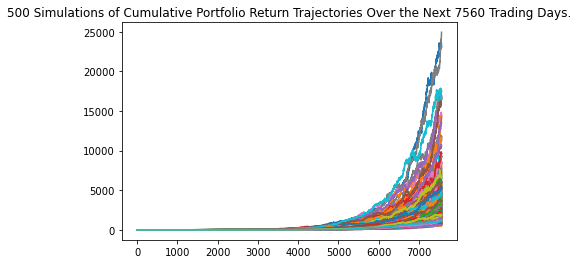

In [103]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_yr_plot_20_80 = MC_thirty_yr_sim_20_80.plot_simulation()
MC_thirty_yr_plot_20_80.get_figure().savefig("MC Thirty Year Line Plot 20_80", bbox_inches = "tight")

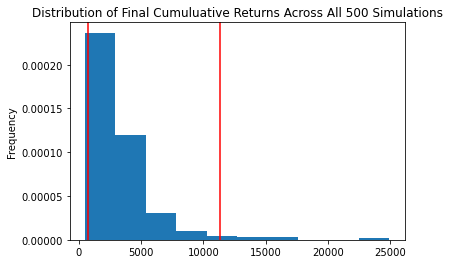

In [104]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_yr_dist_20_80 = MC_thirty_yr_sim_20_80.plot_distribution()
MC_thirty_yr_dist_20_80.get_figure().savefig("MC Thirty Year Distribution 20_80")

In [105]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_yr_table_20_80 = MC_thirty_yr_sim_20_80.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_thirty_yr_table_20_80

count             500.000000
mean             3311.930084
std              2836.476539
min               493.627773
25%              1714.460148
50%              2575.606908
75%              3987.296918
max             24927.015088
95% CI Lower      746.477675
95% CI Upper    11372.239118
Name: 7560, dtype: float64

In [108]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return_20_80 = MC_thirty_yr_table_20_80[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return_20_80 = MC_thirty_yr_table_20_80[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with a current balance of ${total_stocks_bonds: ,.2f} in the portfolio,"
    f" over the next 30 years it will end within in the range of"
        f" ${ci_lower_thirty_cumulative_return_20_80: ,.2f} and ${ci_upper_thirty_cumulative_return_20_80: ,.2f}.")

There is a 95% chance that with a current balance of $ 65,988.80 in the portfolio, over the next 30 years it will end within in the range of $ 49,259,165.99 and $ 750,440,412.74.


#### Run a Monte Carlo simulation of 500 samples and 10 years for the 40/60 portfolio, and then plot the results.

In [110]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 60% to AGG and 40% to SPY.
# Run 500 samples.
MC_ten_yr_sim_40_60 = MCSimulation(
    portfolio_data=ten_yr_prices_df,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*10,
)
# Review the simulation input data
MC_ten_yr_sim_40_60.portfolio_data.head(-5)

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2020-09-15 00:00:00-04:00  118.2900  118.425  118.2900  118.38  3634512   
2020-09-16 00:00:00-04:00  118.5300  118.530  118.2000  118.32  5190572   
2020-09-17 00:00:00-04:00  118.4201  118.520  118.3300  118.36  4263541   
2020-09-18 00:00:00-04:00  118.3900  118.440  118.1800  118.24  4548578   
2020-09-21 00:00:00-04:00  118.4100  118.420  118.2500  118.26  4787684   
...                             ...      ...       ...     ...      ...   
2021-01-25 00:00:00-05:00  117.3900  117.560  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-15 00:00:00-04:00          NaN  341.12  342.0200  338.4683  340.15   
2020-09-16 00:00:00-04:00    -0.000507  341.51  343.0600  338.5200  338.81   
2020-09-17 00:00:00-04:00     0.000338  333.56  337.6996  332.9910  335.86   
2020-09-18 00:00:00-04:00    -0.001014  335.37  335.4900  327.9700  330.69   
2020-09-21 00:00:00-04:00     0.000169  325.70  327.0900  321.7300  327.00   
...                                ...     ...       ...       ...     ...   
2021-01-25 00:00:00-05:00     0.002388  383.67  384.7700  378.4600  384.40   
2021-01-26 00:00:00-05:00    -0.000255  385.41  385.8500  383.5400  383.83   
2021-01-27 00:00:00-05:00     0.000085  380.22  380.3200  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.9300  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.6700  368.2700  370.19   

                                                   
                              volume daily_return  
time                                               
2020-09-15 00:00:00-04:00   43908367          NaN  
2020-09-16 00:00:00-04:00   70521698    -0.003939  
2020-09-17 00:00:00-04:00   80778657    -0.008707  
2020-09-18 00:00:00-04:00   88780313    -0.015393  
2020-09-21 00:00:00-04:00   86591719    -0.011158  
...                              ...          ...  
2021-01-25 00:00:00-05:00   61090775     0.004022  
2021-01-26 00:00:00-05:00   36871235    -0.001483  
2021-01-27 00:00:00-05:00   99246554    -0.024464  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  

[95 rows x 12 columns]

In [111]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr_sim_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995603,0.997074,0.997358,0.997259,1.003425,1.001889,1.005824,1.002426,0.994953,1.002550,...,0.994972,1.007730,0.999422,1.009428,1.007244,0.992966,1.001827,1.015304,1.010798,0.997715
2,0.998035,1.004659,1.010231,0.999670,1.011147,0.998525,1.001234,1.011619,0.995678,0.991374,...,0.998704,1.011368,1.000294,1.013601,1.003464,1.005512,1.007814,1.021452,1.025651,1.006878
3,1.000835,1.004396,1.007066,0.997752,1.009702,1.006474,1.002954,1.007013,1.003475,0.989730,...,0.986947,1.007499,1.002002,1.016178,1.006372,1.013558,1.004208,1.017780,1.034287,1.006384
4,1.002164,1.012766,1.009725,0.991331,1.015449,1.002097,1.015920,1.005368,1.016924,0.985153,...,0.969030,1.016853,1.016298,1.016465,1.000843,1.011573,0.993717,1.021360,1.036518,1.011098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.033950,8.368303,11.078786,5.708462,7.147740,5.877173,9.212949,4.983208,5.720136,4.678066,...,5.476355,5.594677,6.236629,6.994302,7.186022,5.081376,6.397849,5.388447,7.929463,7.505461
2517,5.009019,8.316001,11.077012,5.724013,7.177174,5.914683,9.216064,4.998614,5.749106,4.657618,...,5.446817,5.581940,6.237178,7.008433,7.155277,5.032210,6.428834,5.423333,7.885650,7.575088
2518,5.025484,8.358081,10.965342,5.714409,7.208777,5.879353,9.223352,5.026615,5.770485,4.652310,...,5.444458,5.567178,6.210967,6.918733,7.214999,5.044682,6.475928,5.438037,7.883157,7.585617
2519,5.057797,8.450643,10.941875,5.761879,7.263073,5.889641,9.151124,5.032598,5.752033,4.684382,...,5.414835,5.557438,6.175585,6.874026,7.173476,4.959955,6.510017,5.424790,7.762926,7.637520


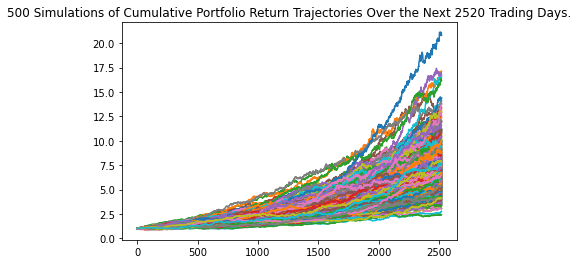

In [112]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_yr_plot_40_60 = MC_ten_yr_sim_40_60.plot_simulation()
MC_ten_yr_plot_40_60.get_figure().savefig("MC Ten Year Line Plot 40_60", bbox_inches = "tight")

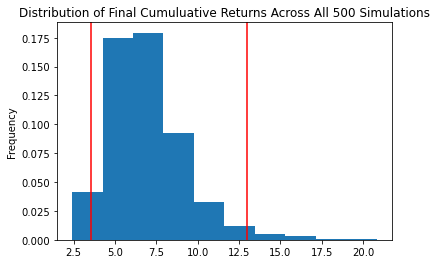

In [113]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_yr_dist_40_60 = MC_ten_yr_sim_40_60.plot_distribution()
MC_ten_yr_dist_40_60.get_figure().savefig("MC Ten Year Distribution 40_60")

In [114]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_yr_table_40_60 = MC_ten_yr_sim_40_60.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_ten_yr_table_40_60

count           500.000000
mean              6.956581
std               2.366729
min               2.404421
25%               5.336008
50%               6.544268
75%               8.045801
max              20.806839
95% CI Lower      3.549741
95% CI Upper     12.973535
Name: 2520, dtype: float64

In [115]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return_40_60 = MC_ten_yr_table_40_60[8] * total_stocks_bonds
ci_upper_ten_cumulative_return_40_60 = MC_ten_yr_table_40_60[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with a current balance of ${total_stocks_bonds: ,.2f} in the portfolio,"
    f" over the next 10 years it will end within in the range of"
        f" ${ci_lower_ten_cumulative_return_40_60: ,.2f} and ${ci_upper_ten_cumulative_return_40_60: ,.2f}.")

There is a 95% chance that with a current balance of $ 65,988.80 in the portfolio, over the next 10 years it will end within in the range of $ 234,243.15 and $ 856,108.03.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** Lets compare the possible outcome ranges for each simulation in a dataframe below. We can see that for both time periods investing more heavily in stocks should result in a higher cumulative return, however we still cannot determine if weighting the portfolio this way would allow the credit union members to retire in ten years. We know that the average annual income for the members is \\$144,000 per year based on the given average monthy income of \\$12,000, but we don't know what percentage of that income the members will require each year once they are retired. We would need that information along with the age of the individual members to know if the amount they save for retirement will last them for the number of years they expect to live post-retirement. It would also be helpful to know if they have a goal amount to save before retiring given their expected life-span, and what types of assets and expenses they will be left with once they retire.

In [123]:
# Create a Python list of each portfolio time period and weight
weight_time_data = ["10-Year 60/40", "10-Year 80/20", "30-Year 60/40", "30-Year 80/20"]

# Review the list
weight_time_data

['10-Year 60/40', '10-Year 80/20', '30-Year 60/40', '30-Year 80/20']

In [131]:
# Create a Pandas DataFrame that shows the upper and lower bounds for each portfolio weight and time period
range_df = pd.DataFrame(
    {"Lower Bound":[ci_lower_ten_cumulative_return_40_60, ci_lower_ten_cumulative_return, ci_lower_thirty_cumulative_return, ci_lower_thirty_cumulative_return_20_80],"Upper Bound":[ci_upper_ten_cumulative_return_40_60, ci_upper_ten_cumulative_return, ci_upper_thirty_cumulative_return, ci_upper_thirty_cumulative_return_20_80]},
    index = weight_time_data
)
range_df.index.name = "Time & Weight"
pd.set_option('display.float_format', '{:,.2f}'.format)

# Display the DataFrame
range_df

,Lower Bound,Upper Bound
Time & Weight,,
10-Year 60/40,"234,243.15","856,108.03"
10-Year 80/20,"445,394.81","2,024,014.88"
30-Year 60/40,"6,321,057.78","65,197,849.82"
30-Year 80/20,"49,259,165.99","750,440,412.74"
